# <center><u> Hypothesis Testing Solutions</u>

#### 1. A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions

In [46]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv('Cutlets.csv')
dataset.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


- Here value of alpha = 0.05; significance level is 5% given. 
- Step 1: To prove Null Hypothesis is true. 
    - Null Hypothesis : 
    - Alternative Hypothesis: 

In [2]:
dataset.isna().sum()

Unit A    0
Unit B    0
dtype: int64

In [3]:
dataset.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


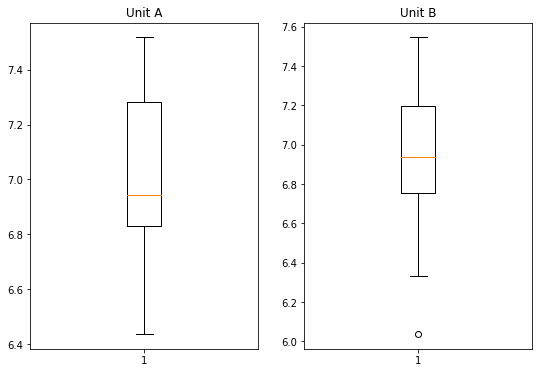

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dataset['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(dataset['Unit B'])
plt.title('Unit B')
plt.show()

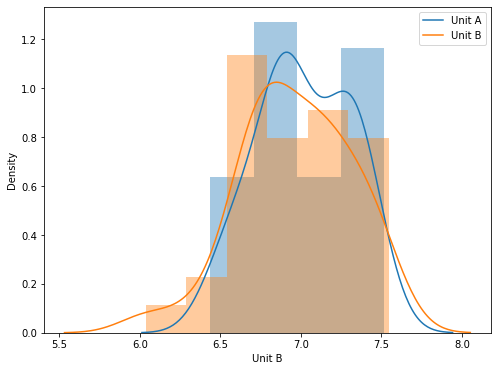

In [47]:
import seaborn as sns
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(dataset['Unit A'], kde = True)
sns.distplot(dataset['Unit B'],hist = True)
plt.legend(labels)

### Checking if the dataset follow Normal Distribution:

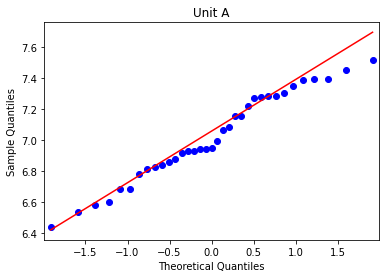

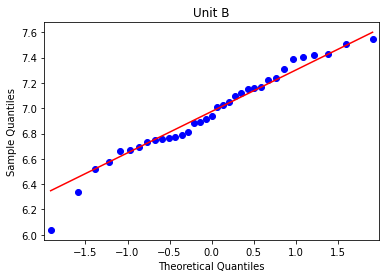

In [48]:
import statsmodels.api as sm
sm.qqplot(dataset["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(dataset["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

### t-statistics for comparing the Hypothesis testing:

In [11]:
import scipy.stats as stats
statistic , p_value = stats.ttest_ind(dataset['Unit A'],dataset['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


In [12]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


- Since the p-value and alpha value are not same, so there is no significant difference between the two Units

#### 2. A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
Minitab File: LabTAT.mtw

Hypothesis Testing Exercise Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

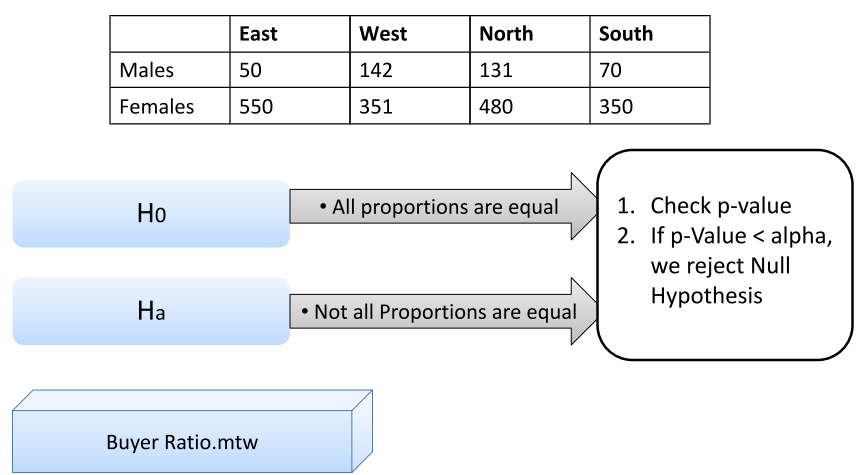

Null Hypothesis : 
Alternative Hypothesis: Atleast one is different
<br>
Significance Level: alpha = 0.05

In [14]:
lab = pd.read_csv('LabTAT.csv')
lab.head(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
5,179.45,197.00,181.51,161.12
6,191.37,166.36,214.21,154.02
7,166.81,169.60,183.43,163.25
8,158.81,175.36,191.60,152.79
9,165.88,198.68,208.43,161.98


In [15]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [16]:
lab.isna().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

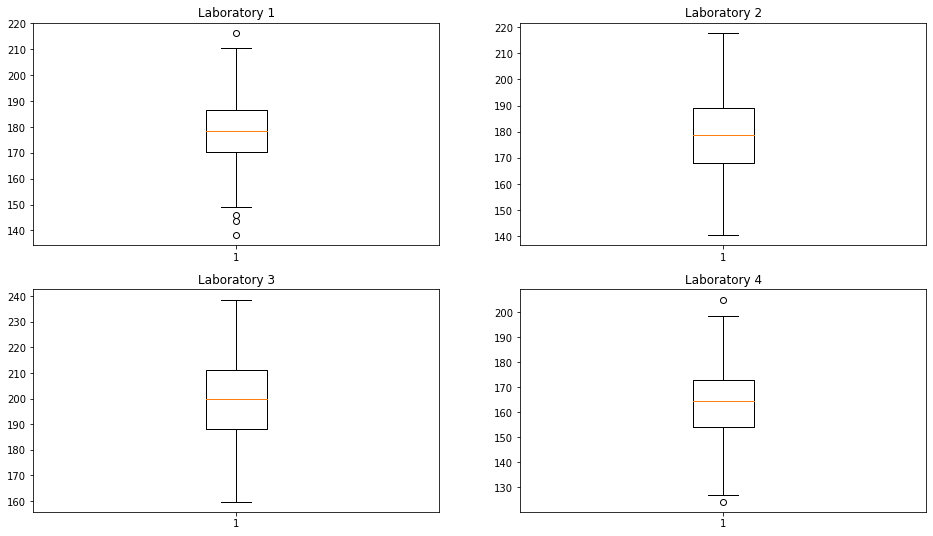

In [17]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(lab['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(lab['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(lab['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(lab['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

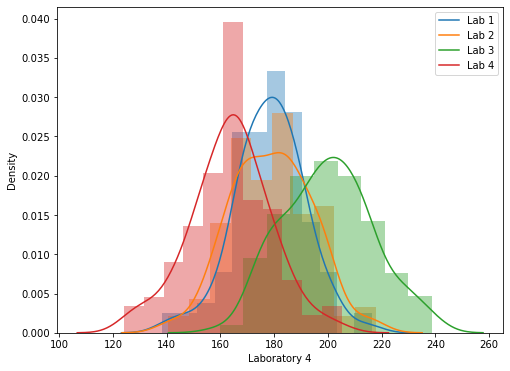

In [49]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(lab['Laboratory 1'], kde = True)
sns.distplot(lab['Laboratory 2'],hist = True)
sns.distplot(lab['Laboratory 3'],hist = True)
sns.distplot(lab['Laboratory 4'],hist = True)
plt.legend(labels)

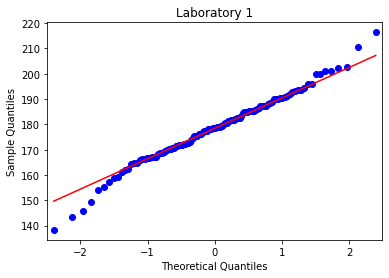

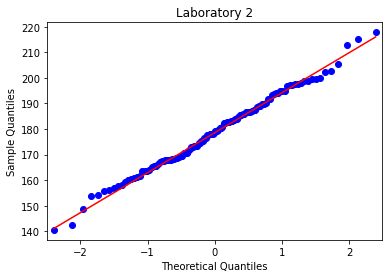

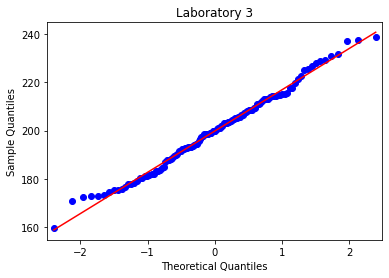

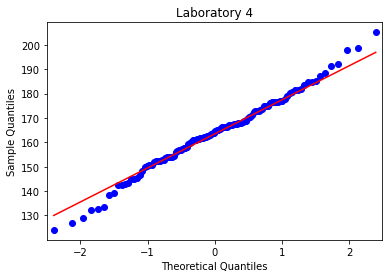

In [50]:
# qqplot for normal distribution test:
sm.qqplot(lab['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(lab['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(lab['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(lab['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

In [20]:
# t-statistics 
test_statistic , p_value = stats.f_oneway(lab.iloc[:,0],lab.iloc[:,1],lab.iloc[:,2],lab.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [21]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


3.
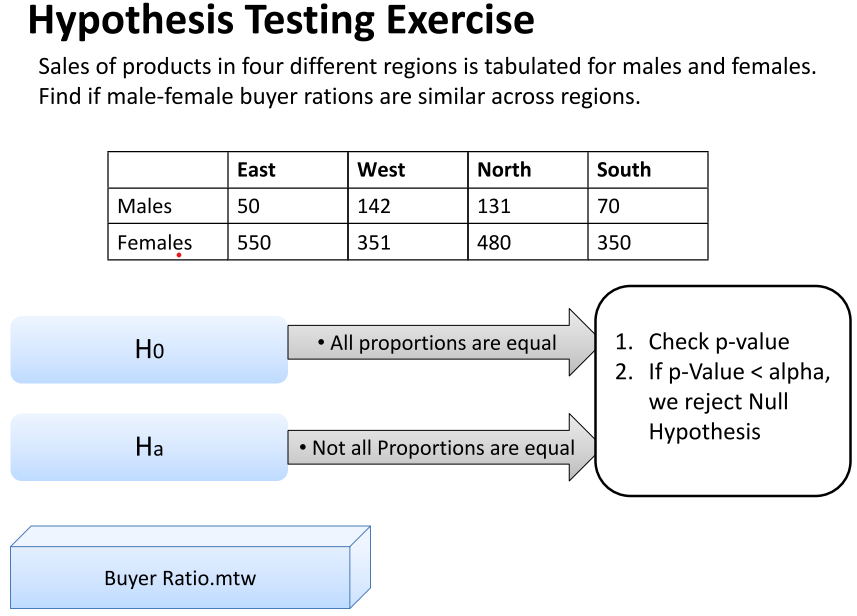

In [24]:
BuyerRatio = pd.read_csv('BuyerRatio.csv')
BuyerRatio.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [27]:
from scipy.stats import chi2_contingency
data = [[50,142,131,70],[435,1523,1356,750]]
stat, p, dof, exp = stats.chi2_contingency(data) 
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [30]:
import numpy as np
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

In [31]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


In [32]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


- there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

4
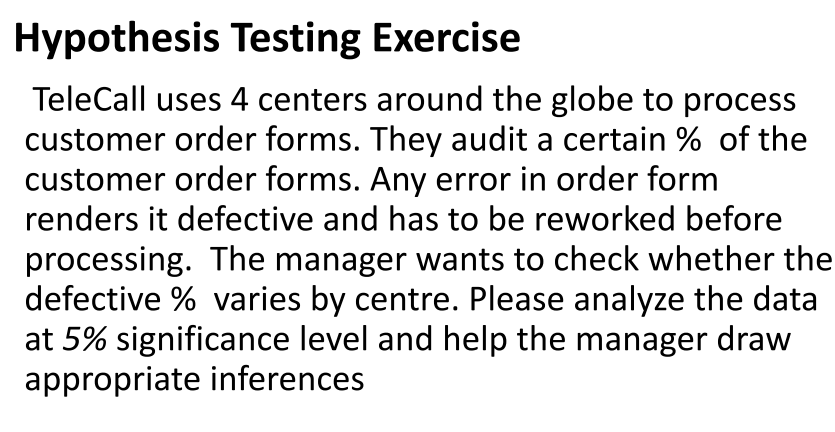

In [33]:
customer= pd.read_csv('Costomer+OrderForm.csv')
customer.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [34]:
customer.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [35]:
customer.isna().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [36]:
customer['Phillippines'].value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [37]:
customer['Indonesia'].value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [38]:
customer['Malta'].value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [39]:
customer['India'].value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [40]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [41]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [42]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [43]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


In [44]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis
